<a href="https://colab.research.google.com/github/anjalish05/computer-vision/blob/main/CV_A4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q2: Contrastive Language-Image Pretraining

#### part-1: Setup Models

Load the ResNet-50 model, initialized in
two different ways:

<b> (a) ImageNet pretraining can be used, specially look at IMAGENET1K_V1.

In [1]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 542.8 kB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-mghb3z3u
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-mghb3z3u
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x8

In [2]:
import torch
import clip
from PIL import Image

In [3]:
from torchvision.models import resnet50, ResNet50_Weights

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_imageNet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

resnet50(weights="IMAGENET1K_V1")
resnet50(pretrained=True)  # deprecated
resnet50(True)  # deprecated

# print(model_imageNet.get_submodule())

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Ple

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<b> (b) OpenAI's CLIP

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_clip, preprocess = clip.load("RN50", device=device)

100%|████████████████████████████████████████| 244M/244M [00:01<00:00, 164MiB/s]


In [6]:
model_clip

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

<b> Do the visual encoders have the same architecture? If not, please describe and explain the differences. </b>

#### part-2: Setup Data

<b> Understand the ImageNet challenge dataset (1000 labels of ILSVRC). <br>
(i) What label hierarchy is used in ImageNet? <br>
(ii) What does a synset mean? <br>
(iii) Could grouping objects based
on synsets lead to problems for visual recognition? <br>
(iv) State 3 types of visual differences we can expect to see in images with objects corresponding to the same synset. </b>

#### part-3: Setup zero-shot CLIP

In [8]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 39.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [9]:
# import the imagenette dataset
from datasets import load_dataset

imagenette = load_dataset(
    'frgfm/imagenette',
    '320px',
    split='validation',
    revision="4d512db"
)
# show dataset info
imagenette

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  # Means the user did not define a `HF_TOKEN` secret => warn
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for frgfm/imagenette contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/frgfm/imagenette
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from t

Generating train split:   0%|          | 0/9469 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3925 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 3925
})

In [10]:
# check labels in the dataset
set(imagenette['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
# labels names
labels = imagenette.info.features['label'].names
labels

['tench',
 'English springer',
 'cassette player',
 'chain saw',
 'church',
 'French horn',
 'garbage truck',
 'gas pump',
 'golf ball',
 'parachute']

In [12]:
# generate sentences
clip_labels = [f"a photo of a {label}" for label in labels]
clip_labels

['a photo of a tench',
 'a photo of a English springer',
 'a photo of a cassette player',
 'a photo of a chain saw',
 'a photo of a church',
 'a photo of a French horn',
 'a photo of a garbage truck',
 'a photo of a gas pump',
 'a photo of a golf ball',
 'a photo of a parachute']

In [13]:
import torch

In [ ]:
# !pip install transformers
from transformers import CLIPProcessor, CLIPModel

In [14]:
# initialization

model_id = "openai/clip-vit-base-patch32"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [15]:
# if you have CUDA set it to the active device like this
device = "cuda" if torch.cuda.is_available() else "cpu"
# move the model to the device
model.to(device)

device

'cuda'

In [16]:
# create label tokens
label_tokens = processor(
    text=clip_labels,
    padding=True,
    images=None,
    return_tensors='pt'
).to(device)

label_tokens['input_ids'][0][:10]

tensor([49406,   320,  1125,   539,   320,  1149,   634, 49407],
       device='cuda:0')

In [17]:
# encode tokens to sentence embeddings
label_emb = model.get_text_features(**label_tokens)
# detach from pytorch gradient computation
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

(10, 512)

In [18]:
label_emb.min(), label_emb.max()

(-1.9079255, 6.17163)

In [19]:
import numpy as np

# normalization
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)
label_emb.min(), label_emb.max()

(-0.87605494, 0.89617443)

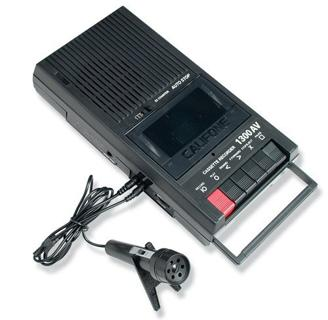

In [ ]:
imagenette[0]['image']

In [ ]:
image = processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
)['pixel_values'].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 512])

In [ ]:
img_emb = img_emb.detach().cpu().numpy()

In [ ]:
scores = np.dot(img_emb, label_emb.T)
scores.shape

(1, 10)

Cosine Similarity

In [ ]:
print("Cosine Similarity for image 0:", scores)

Cosine Similarity for image 0: [[ 5.263069   4.9103017 17.065617   3.1625714  2.3542762 -4.3030663
   1.6701841  5.4977546 -1.3245494  1.1416187]]


In [ ]:
image2 = processor(
    text=None,
    images=imagenette[3]['image'],
    return_tensors='pt'
)['pixel_values'].to(device)

print(image2.shape)

# img_emb = model.get_image_features(image2)
# print(img_emb.shape)

# img_emb = img_emb.detach().cpu().numpy()

# scores = np.dot(img_emb, label_emb.T)
# print(scores.shape)

# print("Cosine Similarity for image 1:", scores)

torch.Size([1, 3, 224, 224])


In [ ]:
import matplotlib.pyplot as plt

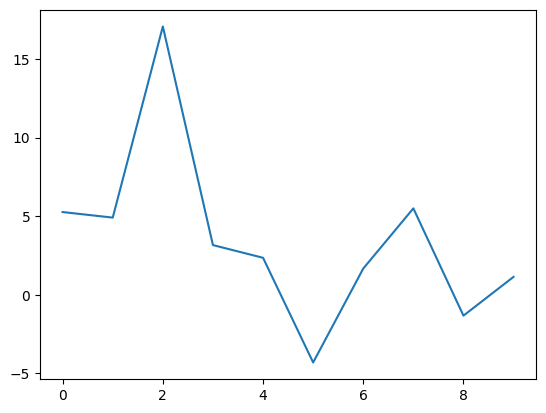

In [ ]:
plt.plot(scores[0])

In [ ]:
# get index of highest score
pred = np.argmax(scores)
pred

2

In [ ]:
# find text label with highest score
labels[pred]

'cassette player'

In [ ]:
np.dot(img_emb, label_emb.T)

array([[ 5.263069 ,  4.9103017, 17.065617 ,  3.1625714,  2.3542762,
        -4.3030663,  1.6701841,  5.4977546, -1.3245494,  1.1416187]],
      dtype=float32)

In [ ]:
from tqdm.auto import tqdm

preds = []
batch_size = 8

for i in tqdm(range(0, len(imagenette), batch_size)):
    i_end = min(i + batch_size, len(imagenette))
    images = processor(
        text=None,
        images=imagenette[i:i_end]['image'],
        return_tensors='pt'
    )['pixel_values'].to(device)
    img_emb = model.get_image_features(images)
    img_emb = img_emb.detach().cpu().numpy()
    scores = np.dot(img_emb, label_emb.T)
    preds.extend(np.argmax(scores, axis=1))

  0%|          | 0/491 [00:00<?, ?it/s]

In [ ]:
# import matplotlib.pyplot as plt
import cv2

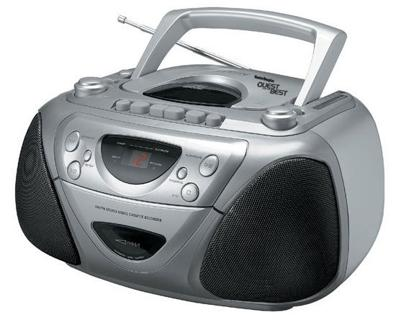

In [ ]:
imagenette[4]['image']
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.axis('off')

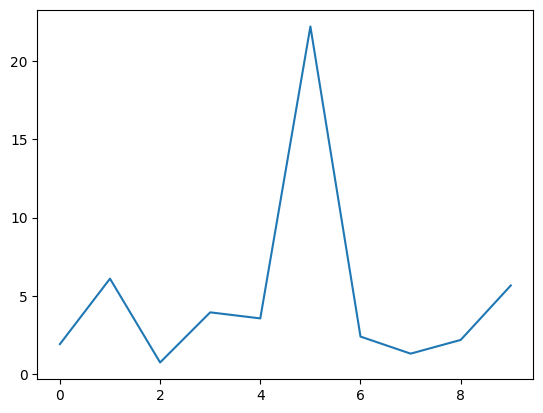

In [ ]:
plt.plot(scores[4])

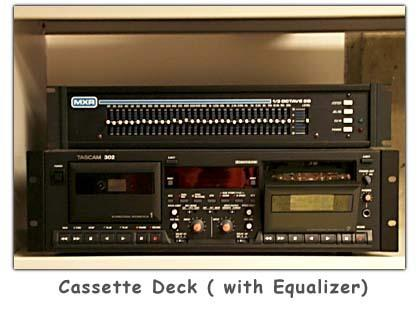

In [ ]:
imagenette[3]['image']
# img = imagenette[3]['image']
# plt.imshow(img)
# plt.axis('off')

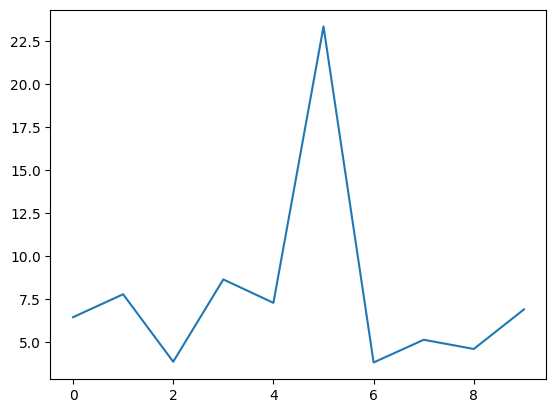

In [ ]:
plt.plot(scores[0])

In [ ]:
true_preds = []
for i, label in enumerate(imagenette['label']):
    if label == preds[i]:
        true_preds.append(1)
    else:
        true_preds.append(0)

print("Accuracy:", sum(true_preds) / len(true_preds))

Accuracy: 0.9870063694267516


#### part-4: CLIP vs ImageNet pretraining

Pick 10 classes from ImageNet (not all from the same branch,
e.g., not all dogs). For each class:

(i) Find 2 images that work well with CLIP, but not with ImageNet pretrained RN50. Reason about why this may be the case. From where did you get these images?


In [ ]:
# number of images in imagenette image dataset
len(imagenette)

imagenette.shape

(3925, 2)

#### part-5: FP16

<b> (i) Convert the RN50 CLIP image encoder model to fp16. Calculate the (wall-clock) time required to encode an
image. Estimate the difference between the fp32 (original) model and the fp16 model. Note, it is common to
report the mean over 100 runs and indicate both the mean and standard deviation. </b>

In [ ]:
import torch
import clip
import numpy as np
import time

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("RN50", device=device)

In [ ]:
# To convert the model to FP16, we'll use the `.half()` method.
model_fp16 = model.to(device).half()

In [ ]:
model_fp16.visual.conv1.weight[0].dtype

torch.float16

In [ ]:
import matplotlib.pyplot as plt

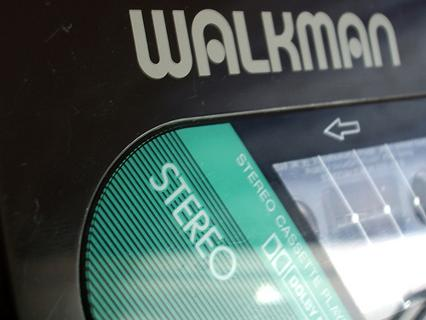

In [ ]:
imagenette[2]['image']
# plt.imshow(input_img)
# plt.axis('off')

In [ ]:
input_image = torch.randn((1, 3, 224, 224), device=device)

# Convert the input image to fp16
input_image_fp16 = input_image.half()


In [ ]:
# func to measure model inference time
def measure_time(model, input_image, num_runs=100):
    timings = []
    with torch.no_grad():
        for _ in range(num_runs):
            start_time = time.time()
            _ = model.encode_image(input_image)
            end_time = time.time()
            timings.append(end_time - start_time)
    return timings

In [ ]:
# To measure inference time for fp32 model
timings_fp32 = measure_time(model, input_image)

# To measure inference time for fp16 model
timings_fp16 = measure_time(model_fp16, input_image_fp16)

print("FP32 time:", timings_fp32)
print("FP16 time:", timings_fp16)

FP32 time: [0.021494626998901367, 0.018100738525390625, 0.019013404846191406, 0.01297140121459961, 0.008894205093383789, 0.008732318878173828, 0.008783817291259766, 0.008970499038696289, 0.009096860885620117, 0.009393930435180664, 0.009256601333618164, 0.009881973266601562, 0.00988626480102539, 0.008910894393920898, 0.009457111358642578, 0.008709907531738281, 0.008903264999389648, 0.008383512496948242, 0.008638381958007812, 0.008548736572265625, 0.008411645889282227, 0.008759021759033203, 0.008439064025878906, 0.012265205383300781, 0.008989095687866211, 0.00854349136352539, 0.00870513916015625, 0.008498191833496094, 0.008676290512084961, 0.008553266525268555, 0.008969306945800781, 0.009210824966430664, 0.008442401885986328, 0.00842142105102539, 0.010695457458496094, 0.008944034576416016, 0.00857853889465332, 0.008365869522094727, 0.008457422256469727, 0.008500814437866211, 0.008440017700195312, 0.008387088775634766, 0.00834345817565918, 0.00842428207397461, 0.008690595626831055, 0.0088

In [ ]:
# Calculate mean and standard deviation for fp32 and fp16
mean_fp32 = np.mean(timings_fp32)
std_fp32 = np.std(timings_fp32)
mean_fp16 = np.mean(timings_fp16)
std_fp16 = np.std(timings_fp16)

print(f"FP32-Mean: {mean_fp32:.5f}s, Std Dev: {std_fp32:.5f}s")
print(f"FP16-Mean: {mean_fp16:.5f}s, Std Dev: {std_fp16:.5f}s")

FP32-Mean: 0.01360s, Std Dev: 0.04397s
FP16-Mean: 0.01194s, Std Dev: 0.00174s


<b>
(ii) For 5 images (1 per class), recalculate the probabilities using the fp16 model. Are there significant differences between the fp32 and fp16 outputs? Why?
</b>

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


In [ ]:
# Loading the standard ResNet-50 pretrained on ImageNet (FP32)
resnet50_fp32 = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).eval().to('cuda')

# Convert it to FP16
resnet50_fp16 = models.resnet50(pretrained=True).eval().half().to('cuda')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load your dataset
dataset = ImageFolder(imagenette, transform=transform)

In [ ]:
# indices = [next(i for i, (img, label) in enumerate(imagenette) if label == x) for x in range(5)]
subset = torch.utils.data.Subset(imagenette, indices)


In [ ]:
loader = DataLoader(subset, batch_size=5, shuffle=False)
images, labels = next(iter(loader))
images = images.to('cuda')

In [ ]:
with torch.no_grad():
    outputs_fp32 = resnet50_fp32(images)
    outputs_fp16 = resnet50_fp16(images.half())

probabilities_fp32 = torch.nn.functional.softmax(outputs_fp32, dim=1)
probabilities_fp16 = torch.nn.functional.softmax(outputs_fp16, dim=1)


In [ ]:
differences = torch.abs(probabilities_fp32 - probabilities_fp16.float())
print("Absolute differences between FP32 and FP16 predictions:", differences)


Absolute differences between FP32 and FP16 predictions: tensor([[1.1224e-08, 1.1262e-08, 1.1460e-08,  ..., 2.4908e-08, 2.7567e-08,
         2.2538e-08],
        [7.3803e-09, 8.4494e-09, 2.1267e-08,  ..., 1.3929e-08, 1.7915e-08,
         2.5872e-08],
        [8.3857e-11, 3.9265e-11, 1.5949e-08,  ..., 1.4593e-10, 1.1104e-10,
         2.5610e-10],
        [2.1805e-12, 5.9274e-13, 8.6468e-11,  ..., 5.1191e-11, 4.9118e-12,
         1.9411e-11],
        [8.6348e-11, 2.6072e-10, 1.7358e-11,  ..., 1.9111e-10, 3.6057e-09,
         1.3129e-10]], device='cuda:0')


<b> (iii) Using nvidia-smi or a profiler, note and explain the differences in memory usage for a forward pass between
fp32 and fp16 models. If you do not use the profiler, please include some screenshots for the assignment.
</b>

In [ ]:
input_fp32 = torch.randn(1, 3, 224, 224).cuda()
input_fp16 = input_fp32.half()

# Perform a forward pass and monitor GPU memory (do this while running `nvidia-smi`)
with torch.no_grad():
    _ = resnet50_fp32(input_fp32)  # Monitor memory usage during this step
    _ = resnet50_fp16(input_fp16)  # Monitor memory usage during this step
